## import

### libraries

In [439]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Model selection and evaluation
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    log_loss,
    roc_auc_score,
    roc_curve,
    auc
)

# Core classifiers
from sklearn.linear_model import (
    LogisticRegression,
    RidgeClassifier,
    PassiveAggressiveClassifier,
    Perceptron,
    LinearRegression

)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    HistGradientBoostingClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    VotingClassifier,
    StackingClassifier
)
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
    BernoulliNB
)
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.cluster import KMeans
from sklearn.semi_supervised import (
    LabelSpreading,
    LabelPropagation
)

# Advanced models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Dimensionality reduction & feature selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

# Calibration and pipelines
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import make_pipeline

# Optimization tools
from skopt.searchcv import BayesSearchCV
from skopt.space import Integer, Real, Categorical

# Utilities
from joblib import dump, load
from itertools import combinations


### import data

In [440]:
# import the data
df = pd.read_excel('Billets.xlsx')

## check load in

In [441]:
df.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [442]:
# info df
df.info()
# check for missing values
df.isnull().sum()
# check for duplicates
df.duplicated().sum()
# check the data types
df.dtypes
# check the shape of the data
df.shape
# check the number of unique values in each column
df.nunique()
# check the descriptive statistics
df.describe()
# check the correlation between the columns
df.corr()
# check the unique values in the 'Type' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


## Linear regression for missing values and analyse


### missing values

In [443]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


### target margin low

In [444]:
target_feature = "margin_low"

### define independent variables

In [445]:
X = df.drop(columns=[target_feature, "is_genuine"])  
y = df[target_feature]  

### split into know and unknown values


In [446]:
df_known = df.dropna(subset=[target_feature]) 
df_missing = df[df[target_feature].isnull()]  

### train linear regression model

In [447]:
X_train = df_known.drop(columns=[target_feature, "is_genuine"])  # Features
y_train = df_known[target_feature]  # Target

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### predict missing values


In [448]:
X_missing = df_missing.drop(columns=[target_feature, "is_genuine"])
predicted_values = model.predict(X_missing)

### fill missing values 

In [449]:
df.loc[df[target_feature].isnull(), target_feature] = predicted_values
print("Missing values filled using Linear Regression!")

Missing values filled using Linear Regression!


### Graph before scaling

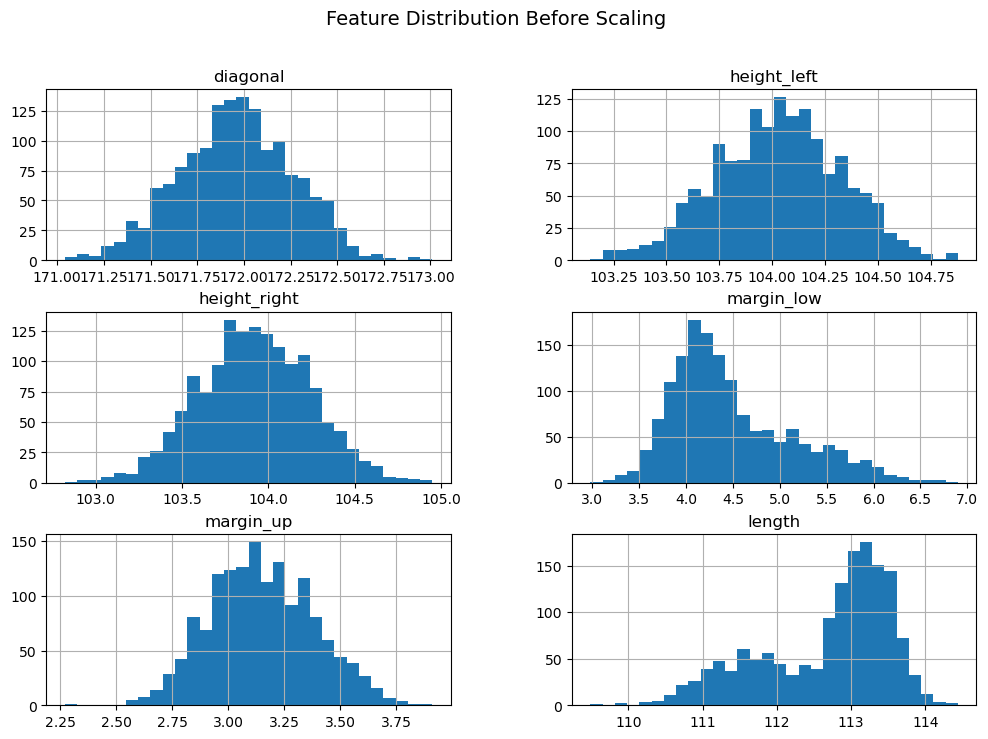

In [450]:
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distribution Before Scaling", fontsize=14)
plt.show()


### Normalizing features


In [451]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_standardized = pd.DataFrame(scaler_standard.fit_transform(df.drop(columns=["is_genuine"])), columns=df.columns[:-1])
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df.drop(columns=["is_genuine"])), columns=df.columns[:-1])

### graph after scaling

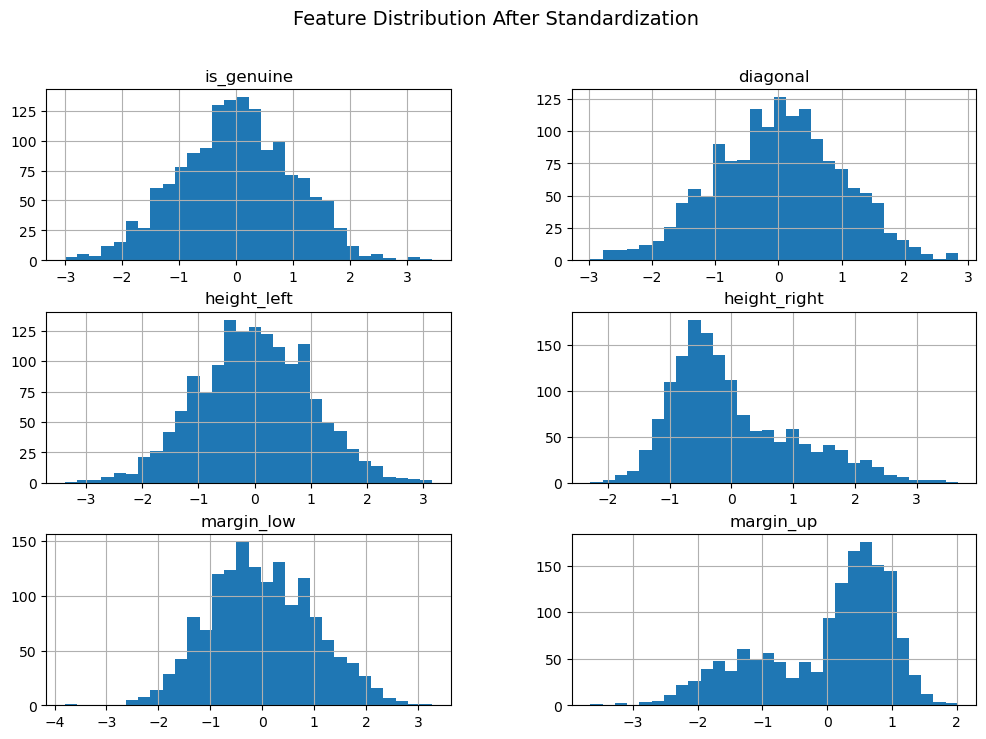

In [452]:
df_standardized.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distribution After Standardization", fontsize=14)
plt.show()

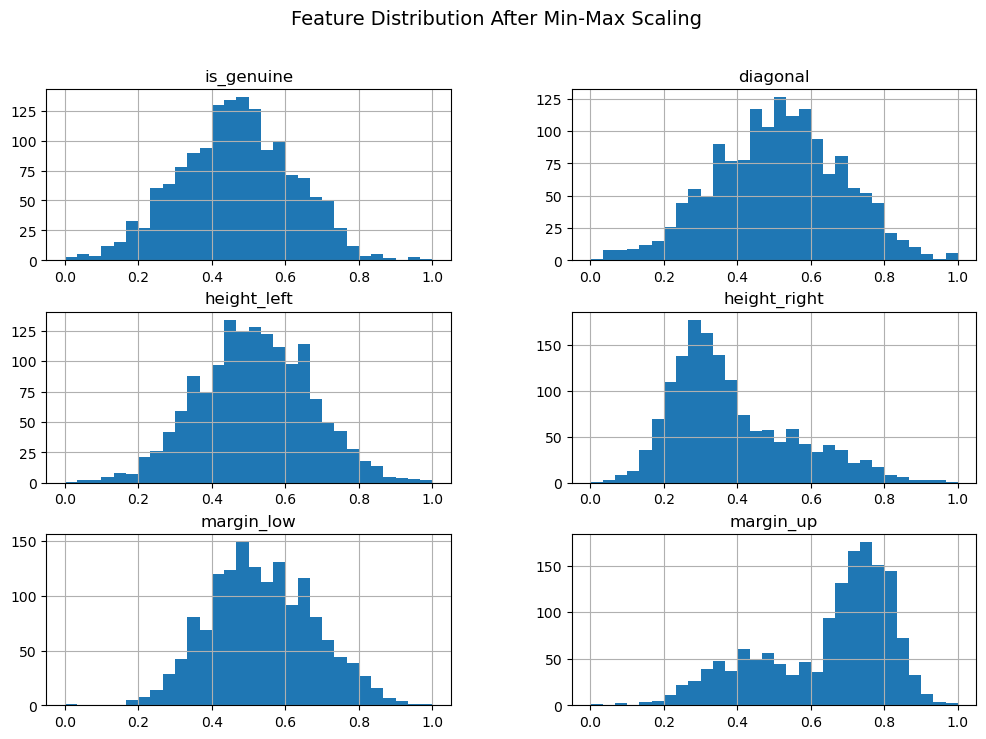

In [453]:
df_minmax.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distribution After Min-Max Scaling", fontsize=14)
plt.show()

### heatmap

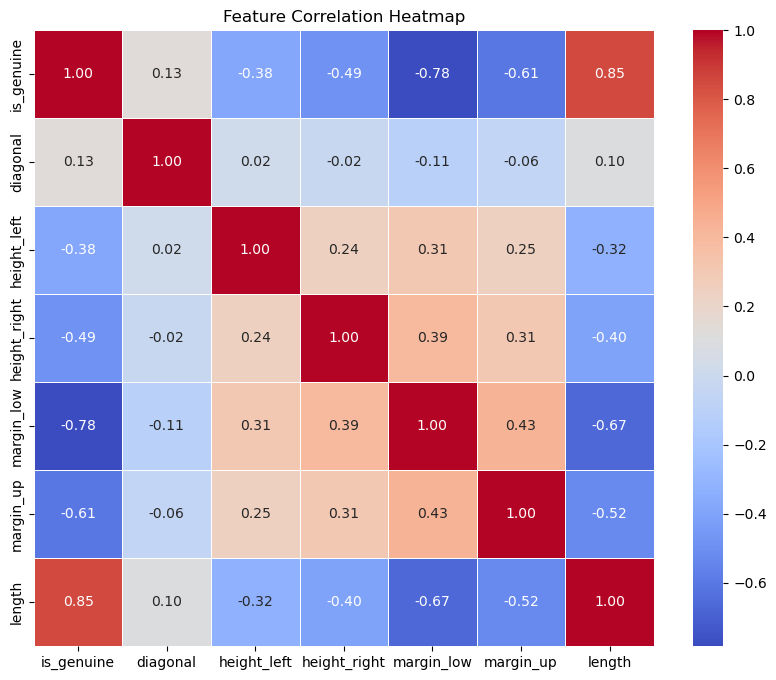

In [454]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### identify most important features


In [455]:
correlation_threshold = 0.5  # Change this value to adjust feature selection sensitivity
correlated_features = df.corr()["is_genuine"].abs().sort_values(ascending=False)
print("Top Correlated Features with Target:\n", correlated_features)

Top Correlated Features with Target:
 is_genuine      1.000000
length          0.849285
margin_low      0.783448
margin_up       0.606262
height_right    0.485092
height_left     0.379833
diagonal        0.132756
Name: is_genuine, dtype: float64


In [456]:
important_features = correlated_features[correlated_features > correlation_threshold].index.tolist()
df_selected = df[important_features]


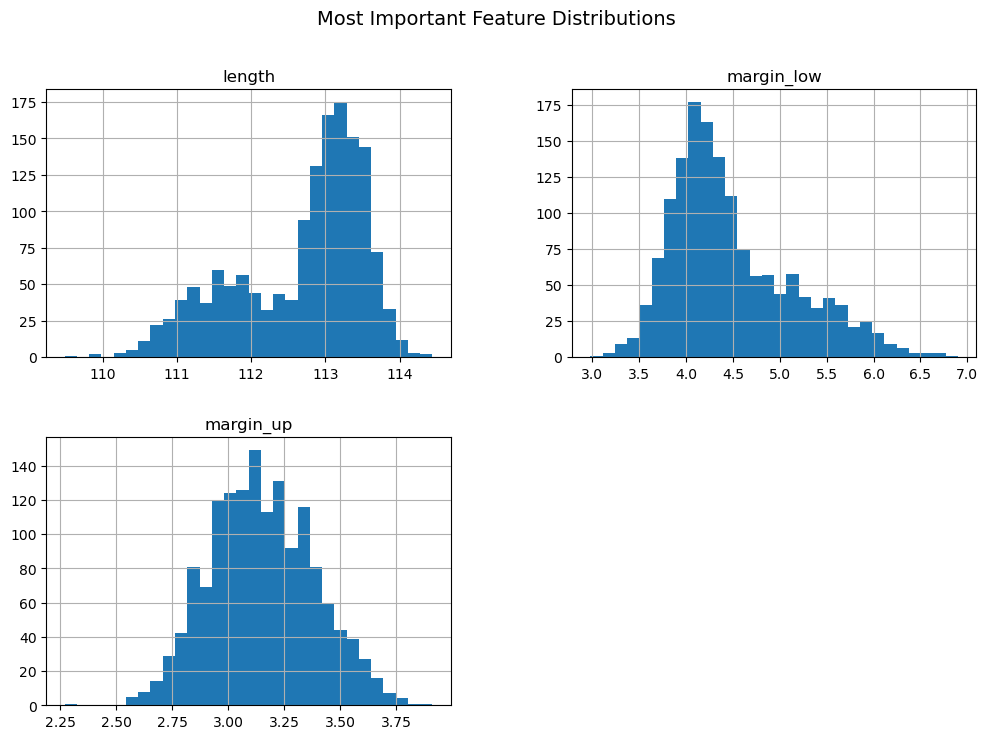

In [457]:
df_selected.hist(figsize=(12, 8), bins=30)
plt.suptitle("Most Important Feature Distributions", fontsize=14)
plt.show()

### Graph 

C:\Users\ruben\AppData\Local\Temp\ipykernel_12468\3427700069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="is_genuine", y="diagonal", palette="coolwarm")


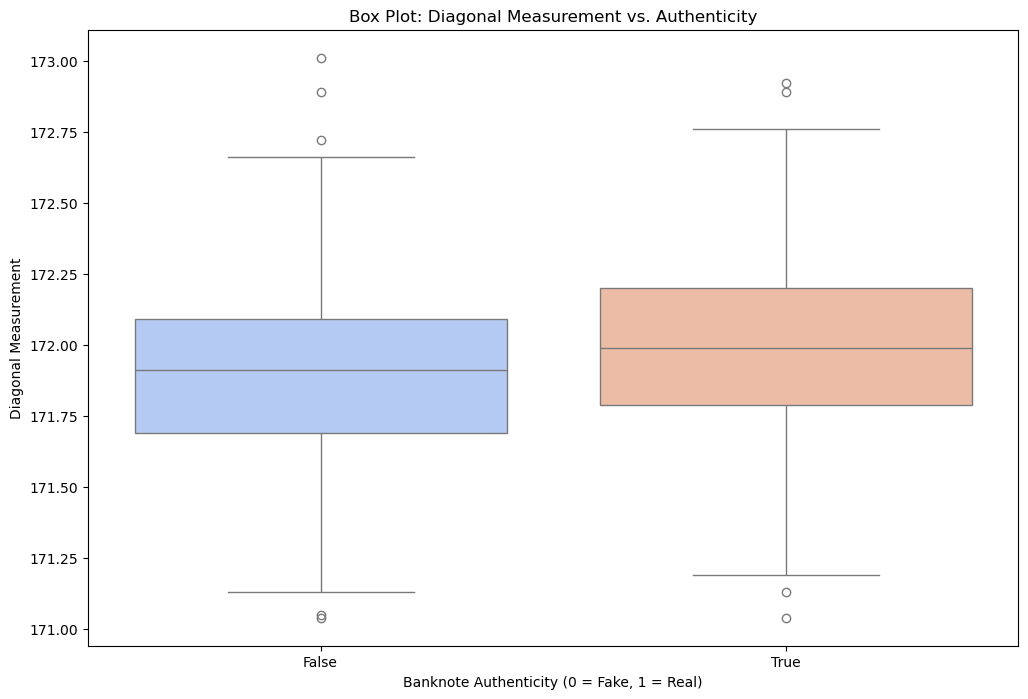

In [458]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="is_genuine", y="diagonal", palette="coolwarm")
plt.xlabel("Banknote Authenticity (0 = Fake, 1 = Real)")
plt.ylabel("Diagonal Measurement")
plt.title("Box Plot: Diagonal Measurement vs. Authenticity")
plt.show()

C:\Users\ruben\AppData\Local\Temp\ipykernel_12468\86338436.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["is_genuine"] == 1]["margin_low"], label="Real Banknotes", shade=True, color="blue")
C:\Users\ruben\AppData\Local\Temp\ipykernel_12468\86338436.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["is_genuine"] == 0]["margin_low"], label="Fake Banknotes", shade=True, color="red")


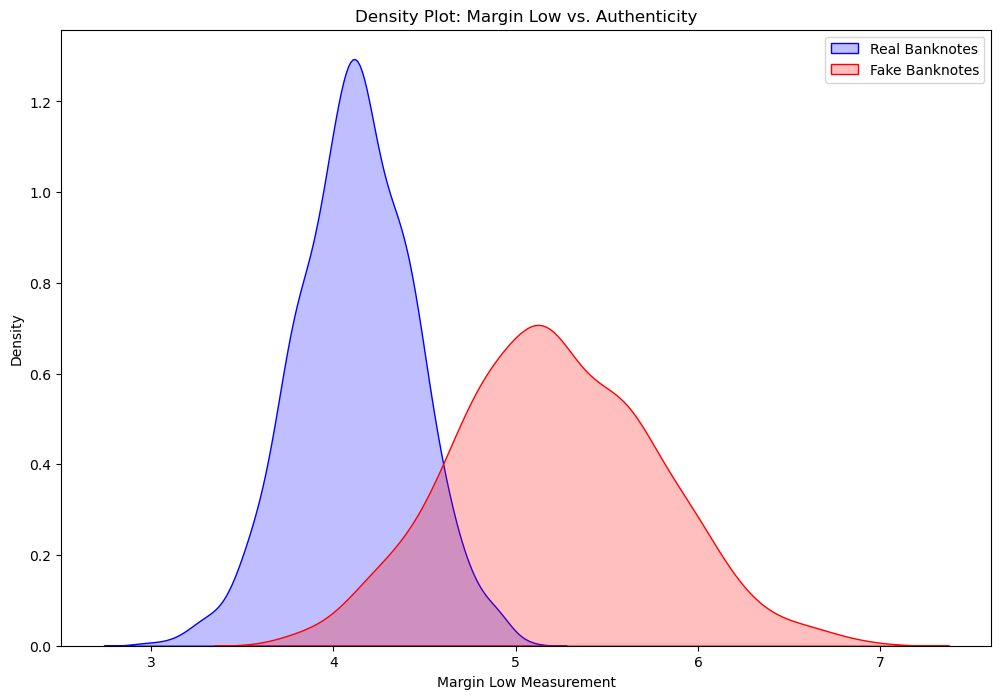

In [459]:
plt.figure(figsize=(12, 8))
sns.kdeplot(df[df["is_genuine"] == 1]["margin_low"], label="Real Banknotes", shade=True, color="blue")
sns.kdeplot(df[df["is_genuine"] == 0]["margin_low"], label="Fake Banknotes", shade=True, color="red")
plt.xlabel("Margin Low Measurement")
plt.ylabel("Density")
plt.title("Density Plot: Margin Low vs. Authenticity")
plt.legend()
plt.show()

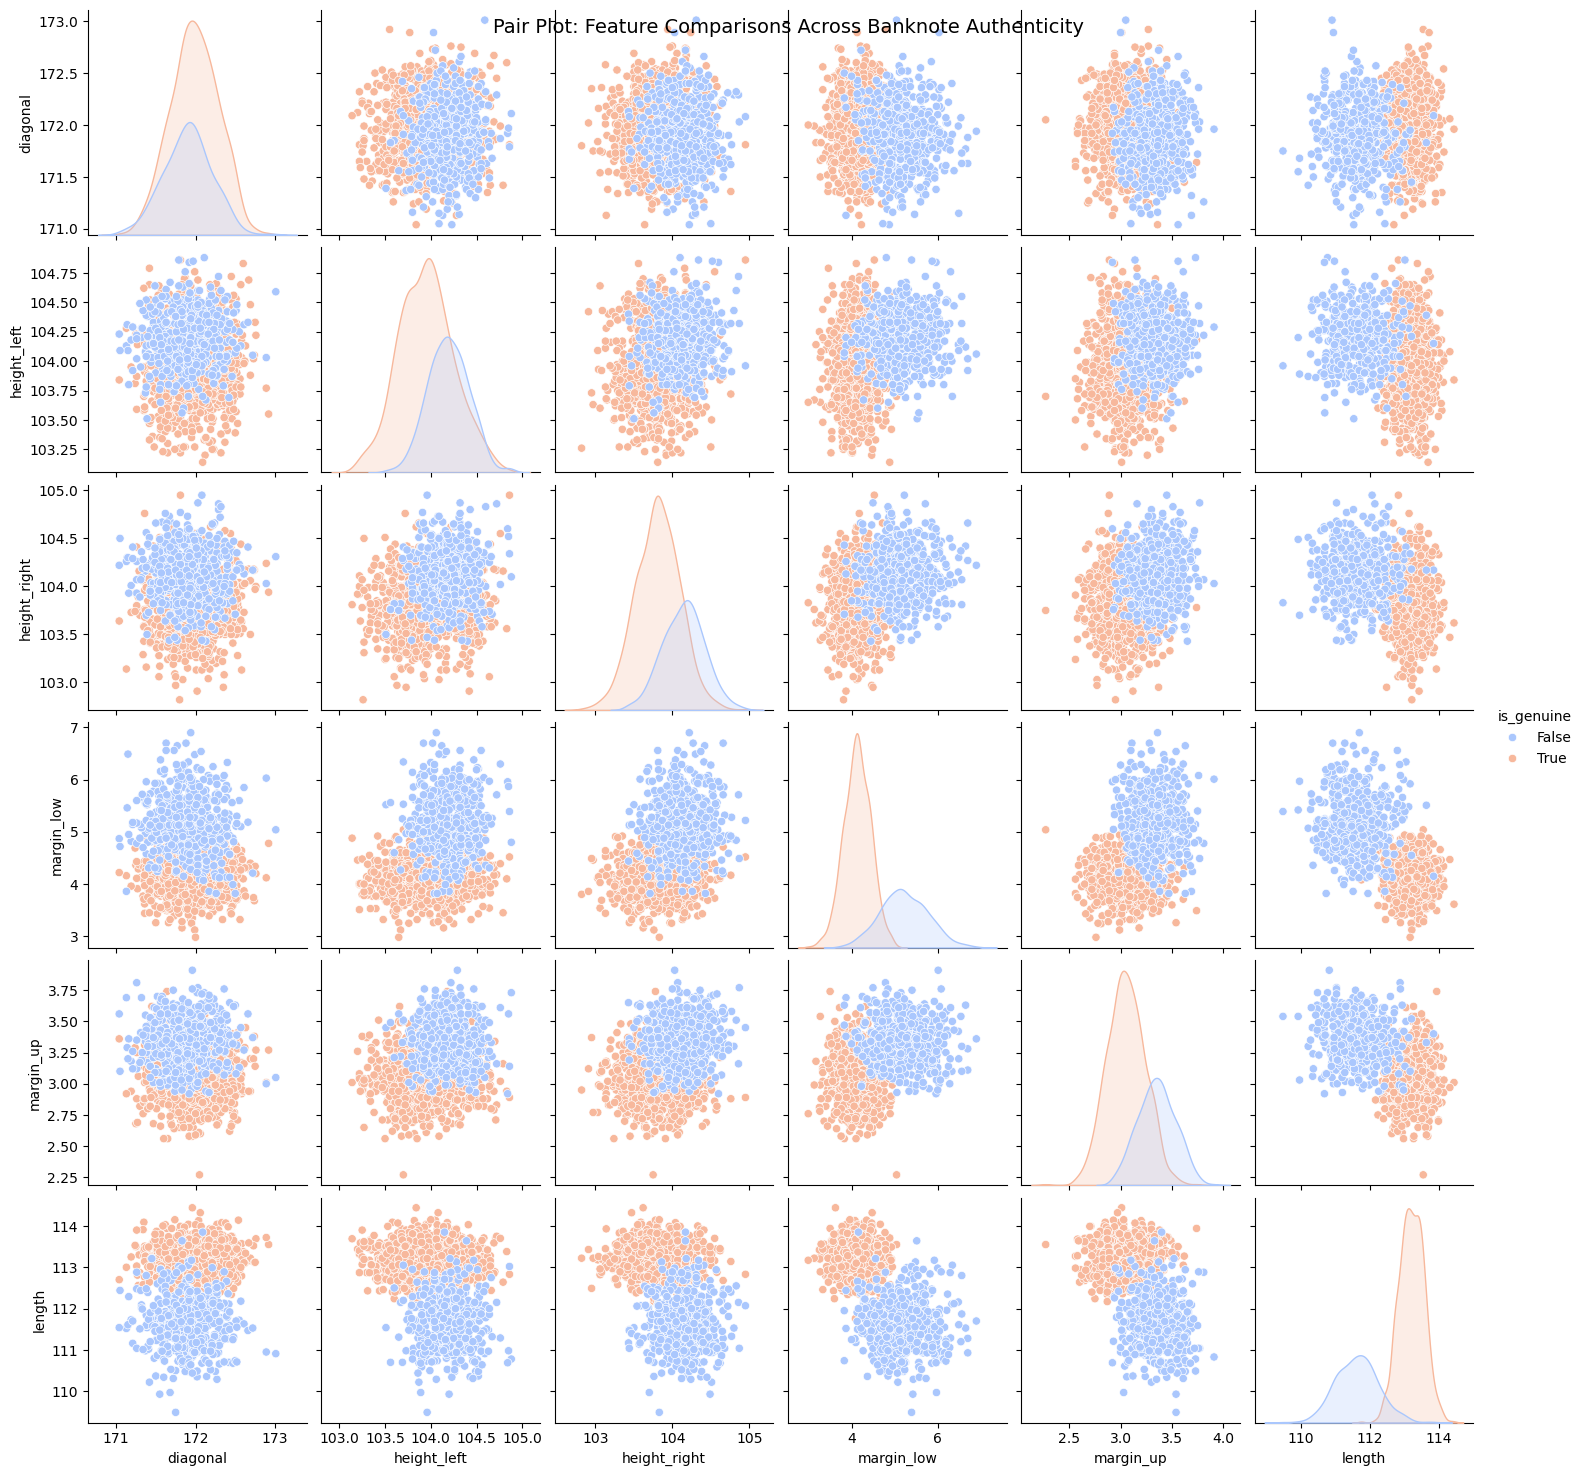

In [460]:
sns.pairplot(df, hue="is_genuine", palette="coolwarm")
plt.suptitle("Pair Plot: Feature Comparisons Across Banknote Authenticity", fontsize=14)
plt.show()

C:\Users\ruben\AppData\Local\Temp\ipykernel_12468\2453161636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_genuine", data=df, palette="coolwarm")


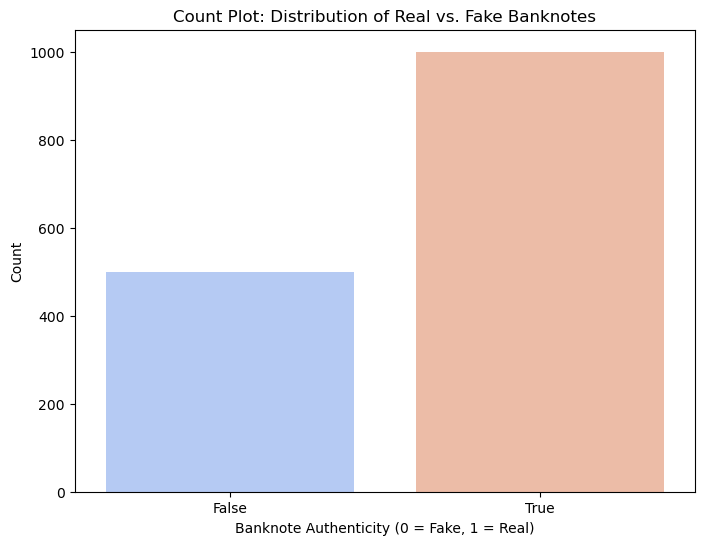

In [461]:
plt.figure(figsize=(8, 6))
sns.countplot(x="is_genuine", data=df, palette="coolwarm")
plt.xlabel("Banknote Authenticity (0 = Fake, 1 = Real)")
plt.ylabel("Count")
plt.title("Count Plot: Distribution of Real vs. Fake Banknotes")
plt.show()

## preparing data for models

In [462]:
#Define features and target variable
X = df.drop(columns=["is_genuine"])  
y = df["is_genuine"] 

In [463]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [464]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## model 1 logistic regression

In [465]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [466]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC curve

In [467]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


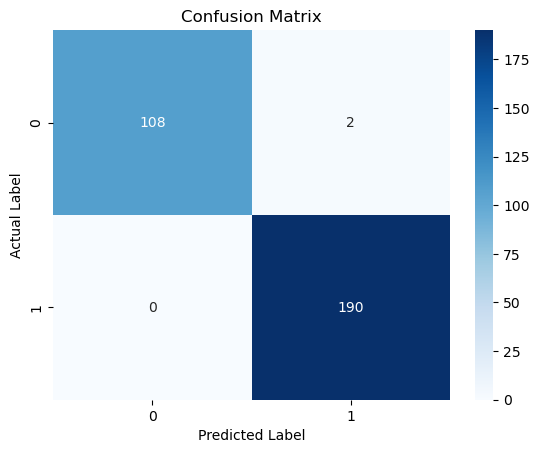

In [468]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

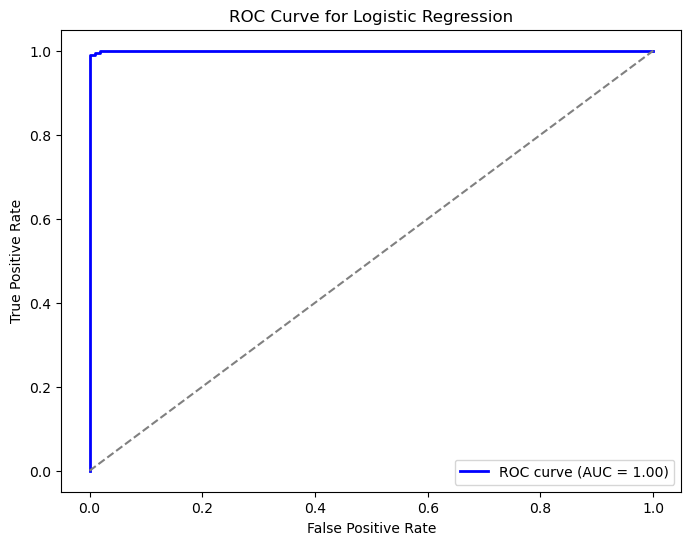

In [469]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

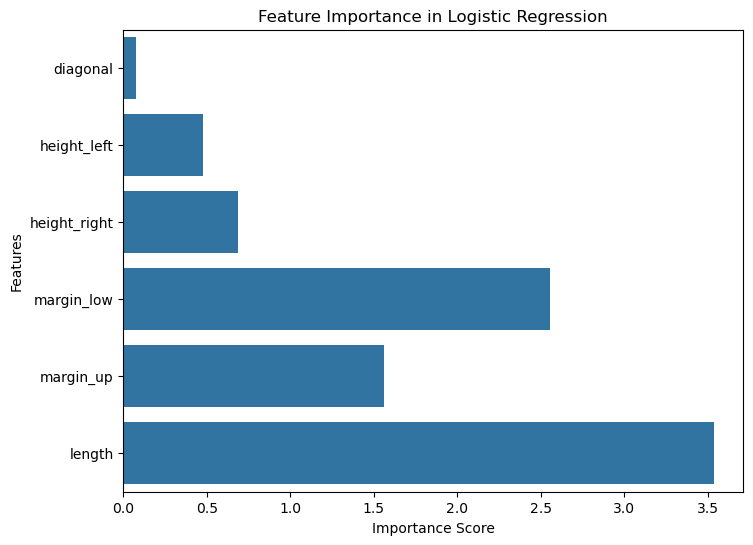

In [470]:
#Feature Importance Visualization
feature_importance = abs(model.coef_[0])
feature_names = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Logistic Regression")
plt.show()

## model 2 KNN

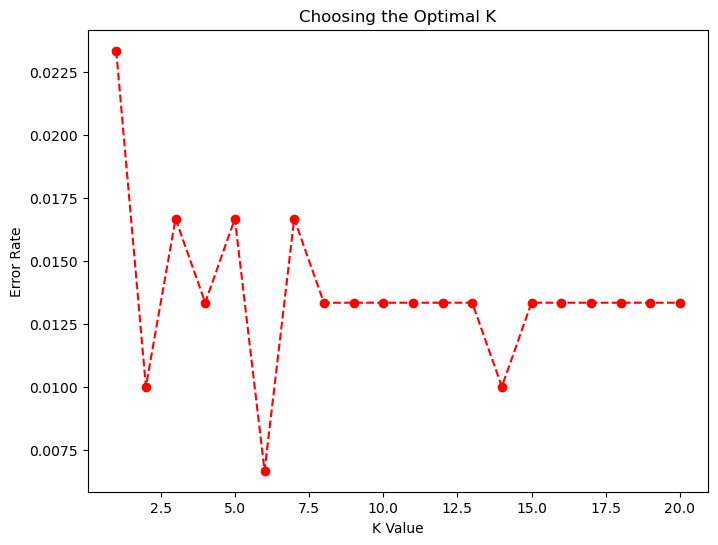

In [471]:
# Find the Optimal K Value
error_rates = []
k_range = range(1, 21)  

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    error_rates.append(np.mean(y_pred_k != y_test))

# Plot Error Rate vs. K Value
plt.figure(figsize=(8, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='dashed', color='red')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Choosing the Optimal K")
plt.show()

In [472]:
# Train KNN Classifier 
k = 6 
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

In [473]:
#Predictions
y_pred = knn_model.predict(X_test_scaled)

In [474]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


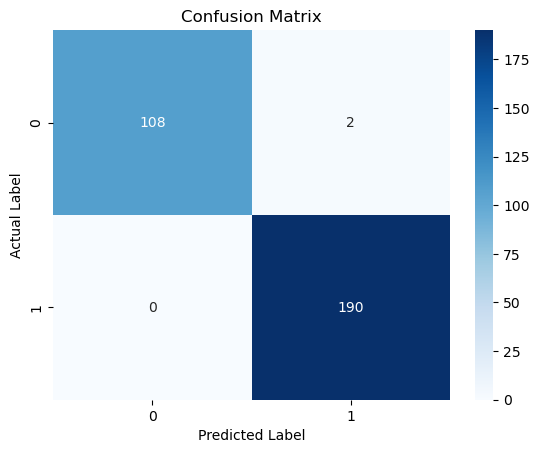

In [475]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [476]:
# Step 11: Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       1.00      0.98      0.99       110
        True       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



## model 3 random forest


In [477]:
#  Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [478]:
# Predictions
y_pred = rf_model.predict(X_test_scaled)

In [479]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


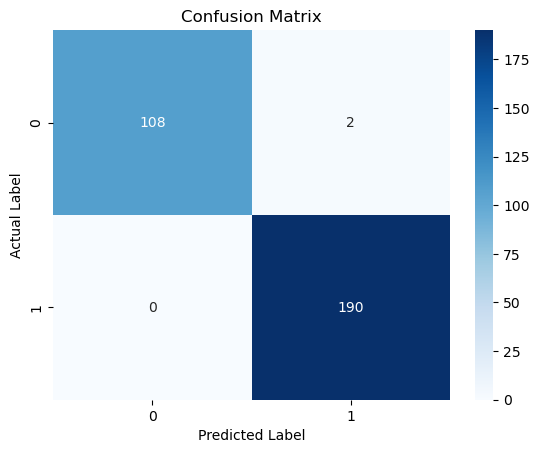

In [480]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [481]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       110
        True       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



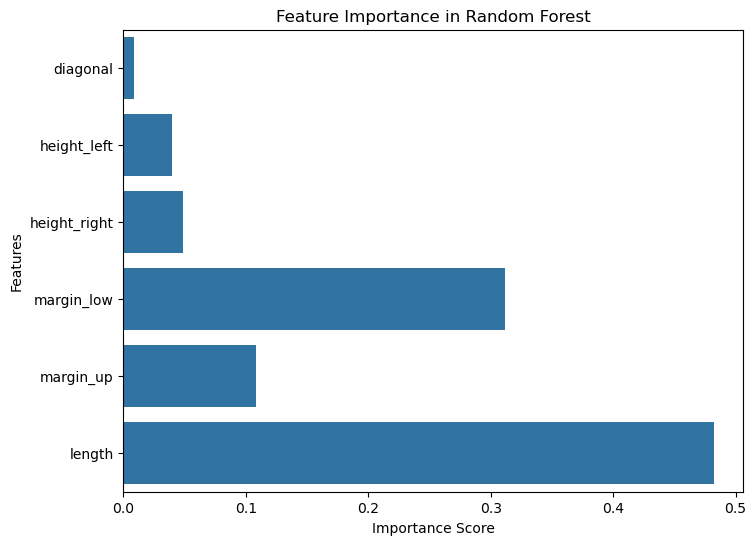

In [482]:
# Feature Importance Visualization
feature_importance = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

## model 4 SVM

In [483]:
#Train SVM Classifier (using RBF kernel)
svm_model = SVC(kernel="rbf", C=10, gamma=0.5, probability=True)  # Hyperparameters optimized
svm_model.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.5, probability=True)

In [484]:
# Predictions
y_pred = svm_model.predict(X_test_scaled)

In [485]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


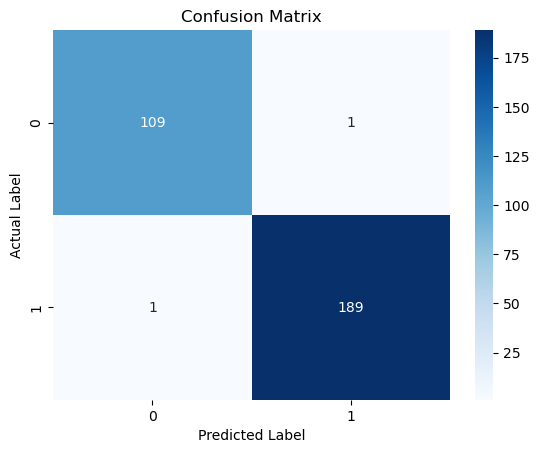

In [486]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [487]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       110
        True       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [488]:
# Visualizing Decision Boundary 
def plot_decision_boundary(X, y, model):
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()

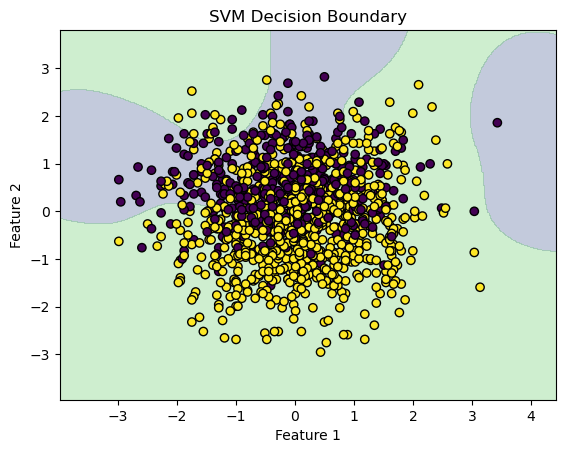

In [489]:
# Selecting only two features for visualization
X_train_vis = X_train_scaled[:, :2]
svm_model_vis = SVC(kernel="rbf", C=10, gamma=0.5)
svm_model_vis.fit(X_train_vis, y_train)

plot_decision_boundary(X_train_vis, y_train, svm_model_vis)

## model 5 kmeans

In [490]:
# Define features (excluding labels since K-Means is unsupervised)
X = df.drop(columns=["is_genuine"])  

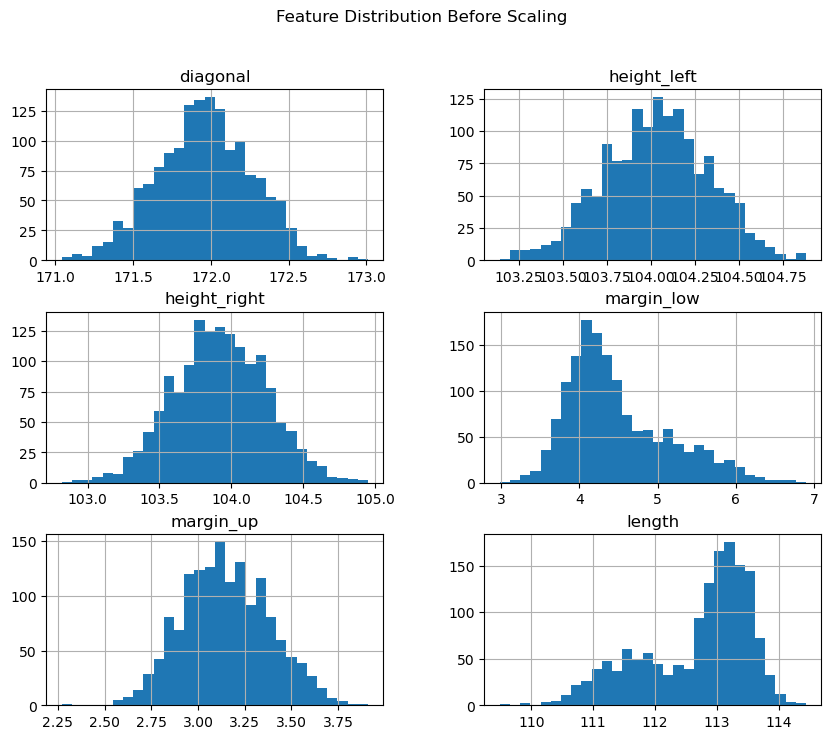

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [491]:
# Standardize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df.hist(figsize=(10, 8), bins=30)
plt.suptitle("Feature Distribution Before Scaling")
plt.show()
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)
error_rates = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    error_rates.append(kmeans.inertia_)

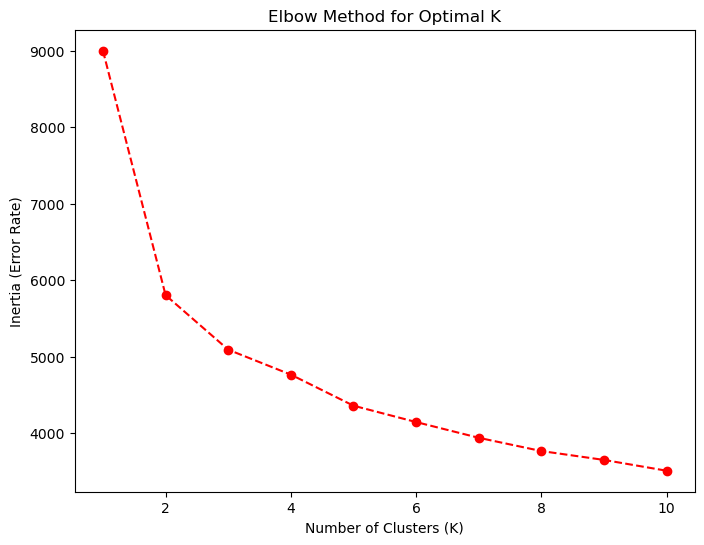

In [492]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='dashed', color='red')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Error Rate)")
plt.title("Elbow Method for Optimal K")
plt.show()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

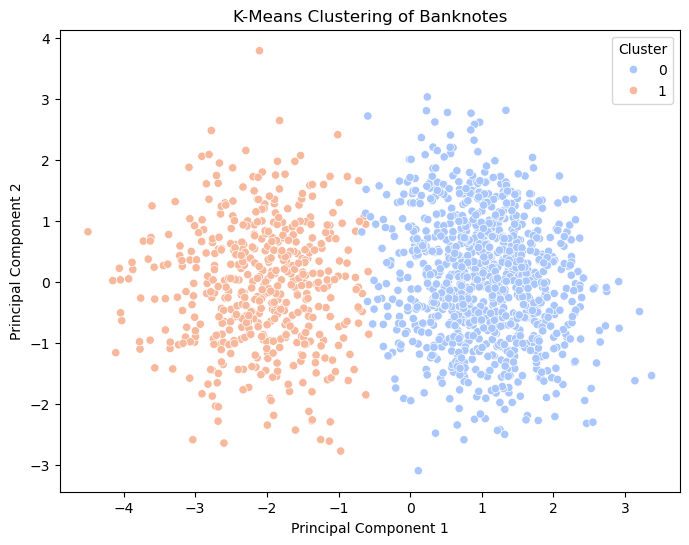

In [493]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="coolwarm")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering of Banknotes")
plt.show()

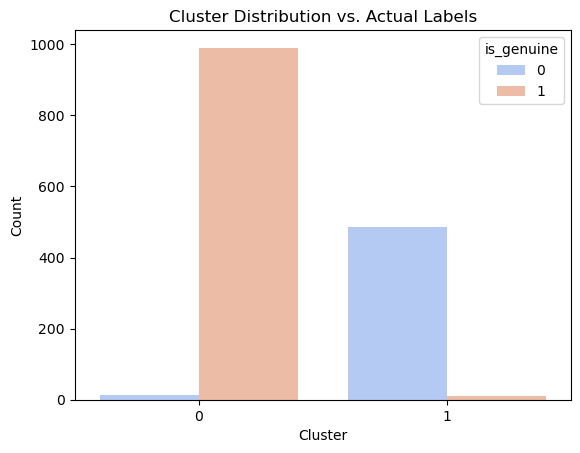

In [494]:
df["is_genuine"] = df["is_genuine"].astype(int)  # Ensure labels are numeric
sns.countplot(x=df["Cluster"], hue=df["is_genuine"], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Cluster Distribution vs. Actual Labels")
plt.show()

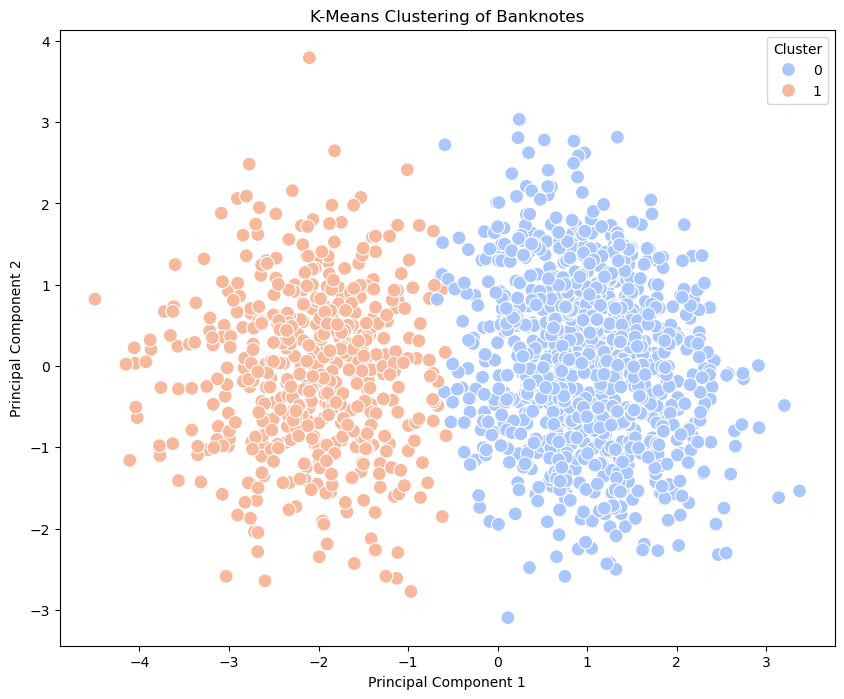

In [495]:
# Visualizing Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="coolwarm", s=100)
plt.title("K-Means Clustering of Banknotes")    
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

## decide best model

In [496]:
#Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel="rbf", probability=True),
    "kmeans": KMeans(n_clusters=2, random_state=42),
}

In [497]:
# Step 7: Train models and store results
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append({"Model": name, "Accuracy": accuracy, "Precision": precision, 
                    "Recall": recall, "F1-Score": f1, "AUC-ROC": auc})

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [498]:
# Step 8: Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.993333   0.989583  1.000000  0.994764  0.999856
1                  KNN  0.983333   0.974359  1.000000  0.987013  0.995120
2        Random Forest  0.993333   0.989583  1.000000  0.994764  0.999785
3                  SVM  0.996667   0.994764  1.000000  0.997375  0.999856
4               kmeans  0.990000   0.994709  0.989474  0.992084       NaN


C:\Users\ruben\AppData\Local\Temp\ipykernel_12468\2907986869.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="coolwarm")


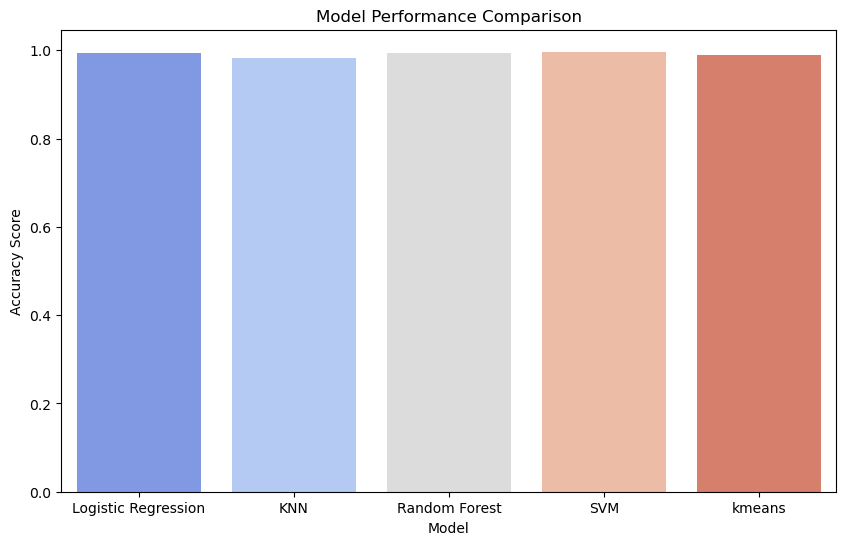

In [499]:
# Step 9: Visualizing Model Performance
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="coolwarm")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.show()

In [500]:
# Step 10: Choosing the Best Model Based on Accuracy
best_model = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
print(f"Best model selected: {best_model}")

Best model selected: SVM


In [501]:
# Selecting the actual model object
best_model_name = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name] 

In [502]:
# Saving the trained model
from joblib import dump
dump(best_model, "best_model.pkl") 
print(f"Best model '{best_model_name}' saved successfully as 'best_model.pkl'.")

Best model 'SVM' saved successfully as 'best_model.pkl'.


## model voting model

In [503]:
# Create a Voting Classifier with the trained models 
voting_model = VotingClassifier(estimators=[ ('logistic', models['Logistic Regression']), ('knn', models['KNN']), ('rf', models['Random Forest']), ('svm', models['SVM']) ], voting='soft') 

In [504]:
# Train the Voting Classifier 
voting_model.fit(X_train_scaled, y_train) 

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [505]:
# Predictions with Voting Classifier 
y_pred_voting = voting_model.predict(X_test_scaled) 

In [506]:
# Evaluate Voting Classifier Performance 
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.2f}") 

Voting Classifier Accuracy: 0.99


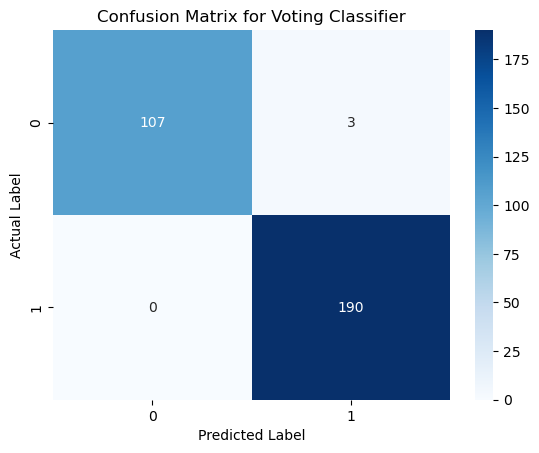

In [507]:
# Confusion Matrix for Voting Classifier 
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting) 
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues') 
plt.xlabel("Predicted Label") 
plt.ylabel("Actual Label") 
plt.title("Confusion Matrix for Voting Classifier") 
plt.show() 

In [508]:
# Classification Report for Voting Classifier 
print(classification_report(y_test, y_pred_voting))

              precision    recall  f1-score   support

       False       1.00      0.97      0.99       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [509]:
# SSave the Voting Classifier Model 
from joblib import dump 
dump(voting_model, "voting_classifier_model.pkl") 
# # Saves the entire model object 
print("Voting Classifier model saved successfully as 'voting_classifier_model.pkl'.")

Voting Classifier model saved successfully as 'voting_classifier_model.pkl'.


## model elo model

In [510]:
#drop kmeans from models
models.pop("kmeans", None)

KMeans(n_clusters=2, random_state=42)

In [511]:
# Initialize Elo ratings for each model
elo_ratings = {
    'Logistic Regression': 1000,
    'KNN': 1000,
    'Random Forest': 1000,
    'SVM': 1000,
}
def update_elo(winner, loser, k=32):
    """Update Elo ratings based on match result."""
    expected_win = 1 / (1 + 10 ** ((elo_ratings[loser] - elo_ratings[winner]) / 400))
    elo_ratings[winner] += k * (1 - expected_win)
    elo_ratings[loser] -= k * expected_win


In [512]:
# Collect predictions and evaluate models
individual_predictions = {name: model.predict(X_test_scaled) for name, model in models.items()}
accuracies = {name: accuracy_score(y_test, pred) for name, pred in individual_predictions.items()}

In [513]:
# Print each model's accuracy for reference
print("Model Accuracies:")
for name, acc in accuracies.items():
    print(f"{name}: {acc:.2f}")

Model Accuracies:
Logistic Regression: 0.99
KNN: 0.98
Random Forest: 0.99
SVM: 1.00


In [514]:
# Update Elo ratings using pairwise comparisons for every unique pair of models.

for model_a, model_b in combinations(models.keys(), 2):
    if accuracies[model_a] > accuracies[model_b]:
        update_elo(model_a, model_b)
    elif accuracies[model_a] < accuracies[model_b]:
        update_elo(model_b, model_a)

In [515]:
# Display the updated Elo ratings.
print("\nUpdated Elo Ratings:")
for name, rating in elo_ratings.items():
    print(f"{name}: {rating:.2f}")


Updated Elo Ratings:
Logistic Regression: 1000.74
KNN: 949.00
Random Forest: 998.56
SVM: 1045.77


In [516]:
# Convert Elo ratings to weights for the Voting Classifier.
total_rating = sum(elo_ratings.values())
elo_weights = {name: rating / total_rating for name, rating in elo_ratings.items()}

In [517]:
# Create the weighted Voting Classifier using soft voting.
# The weights are aligned with the order of the models in the dictionary.
voting_model = VotingClassifier(
    estimators=[(name, models[name]) for name in models],
    voting='soft',
    weights=[elo_weights[name] for name in models]
)


In [518]:
# Fit the Voting Classifier on the training data.
voting_model.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('Random Forest', RandomForestClassifier()),
                             ('SVM', SVC(probability=True))],
                 voting='soft',
                 weights=[0.25055527485326634, 0.23760217548707893,
                          0.25001132048497365, 0.26183122917468116])

In [519]:
# Evaluate the new Elo-weighted Voting Classifier.
y_pred_voting = voting_model.predict(X_test_scaled)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"\nElo-weighted Voting Classifier Accuracy: {voting_accuracy:.2f}")


Elo-weighted Voting Classifier Accuracy: 0.99


C:\Users\ruben\AppData\Local\Temp\ipykernel_12468\3530133512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(elo_ratings.keys()), y=list(elo_ratings.values()), palette="coolwarm")


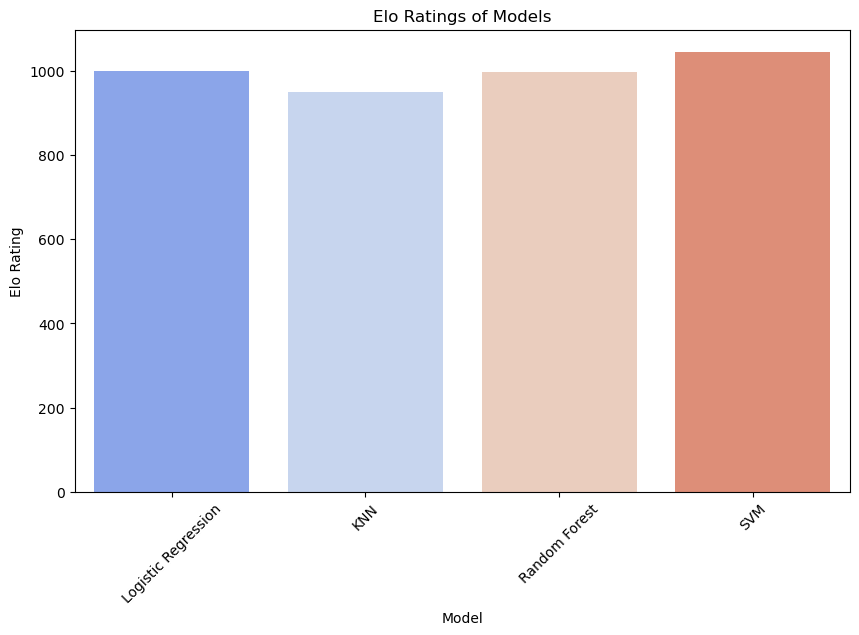

In [520]:
# Plot the Elo ratings for each model for a visual comparison.
plt.figure(figsize=(10, 6))
sns.barplot(x=list(elo_ratings.keys()), y=list(elo_ratings.values()), palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Elo Rating")
plt.title("Elo Ratings of Models")
plt.xticks(rotation=45)
plt.show()


## evaluate model

In [521]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(model, name, X_train, y_train, X_test, y_test, cmap='Blues'):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print performance
    print(f"\n🔍 {name} Evaluation")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.title(f"{name} – Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


## test different models

### test models already used


🔍 Logistic Regression Evaluation
Accuracy: 0.9933
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       110
        True       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



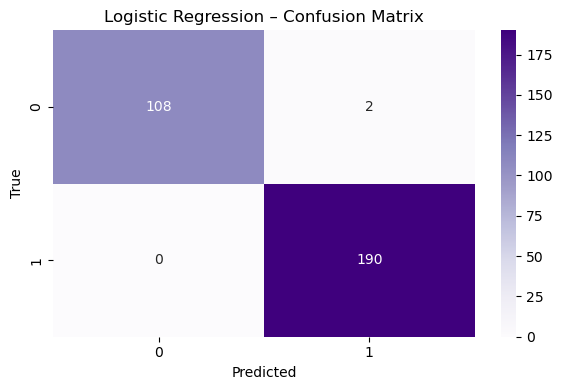


🔍 KNN Evaluation
Accuracy: 0.9833
              precision    recall  f1-score   support

       False       1.00      0.95      0.98       110
        True       0.97      1.00      0.99       190

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



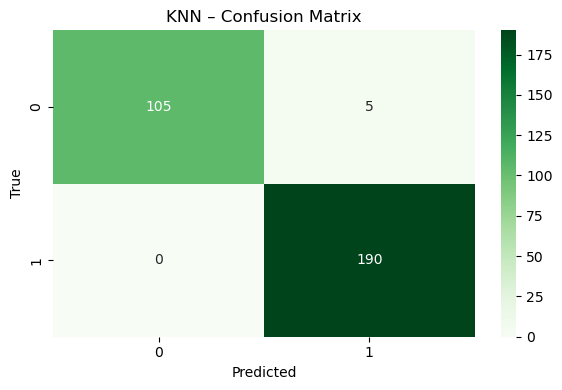


🔍 Random Forest Evaluation
Accuracy: 0.9900
              precision    recall  f1-score   support

       False       1.00      0.97      0.99       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



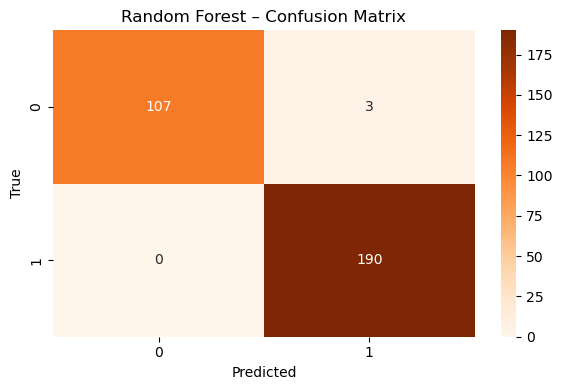


🔍 SVM Evaluation
Accuracy: 0.9967
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       110
        True       0.99      1.00      1.00       190

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



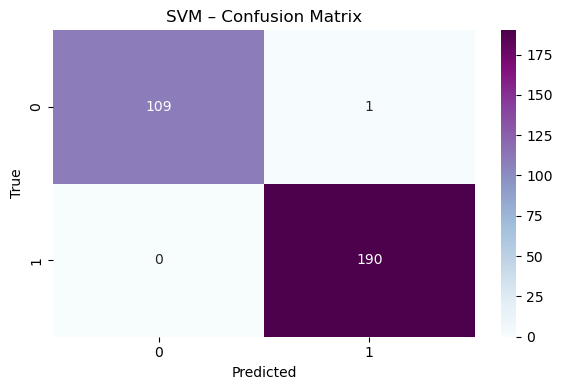

In [522]:
evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression", X_train_scaled, y_train, X_test_scaled, y_test, cmap='Purples')
evaluate_model(KNeighborsClassifier(), "KNN", X_train_scaled, y_train, X_test_scaled, y_test, cmap='Greens')
evaluate_model(RandomForestClassifier(), "Random Forest", X_train_scaled, y_train, X_test_scaled, y_test, cmap='Oranges')
evaluate_model(SVC(probability=True), "SVM", X_train_scaled, y_train, X_test_scaled, y_test, cmap='BuPu')

### mlpclassifier


🔍 MLP Neural Network Evaluation
Accuracy: 0.9933
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       110
        True       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



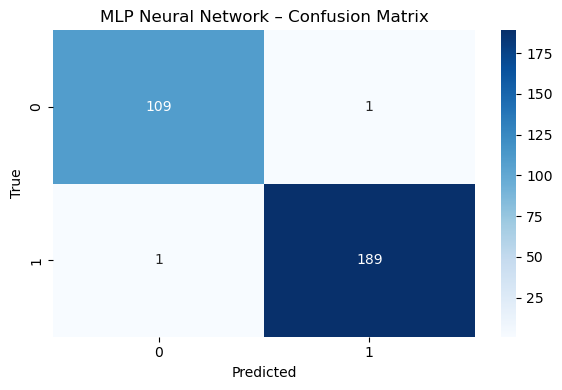

In [523]:
evaluate_model(MLPClassifier(hidden_layer_sizes=(100,), max_iter=500), "MLP Neural Network", X_train_scaled, y_train, X_test_scaled, y_test, cmap='Blues')

### XGBClasssifier

c:\Users\ruben\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:02:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost Evaluation
Accuracy: 0.9933
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       110
        True       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



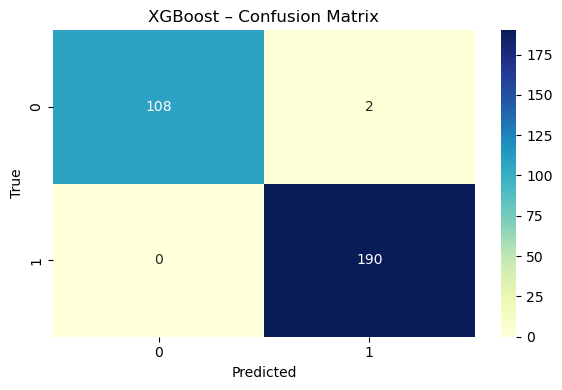

In [524]:
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), "XGBoost", X_train_scaled, y_train, X_test_scaled, y_test, cmap='YlGnBu')

### QDA


🔍 QDA Evaluation
Accuracy: 0.9967
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       110
        True       0.99      1.00      1.00       190

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



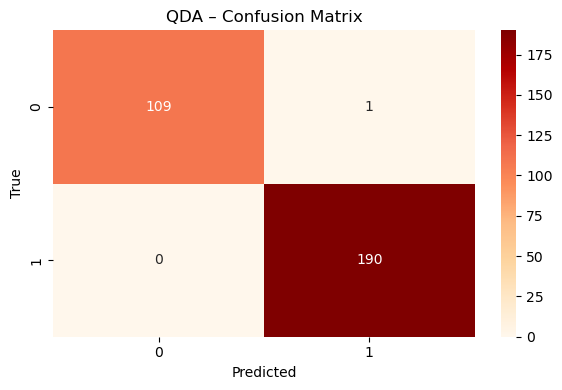

In [525]:
evaluate_model(QuadraticDiscriminantAnalysis(), "QDA", X_train_scaled, y_train, X_test_scaled, y_test, cmap='OrRd')

### GaussianNB


🔍 Naive Bayes Evaluation
Accuracy: 0.9933
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       110
        True       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



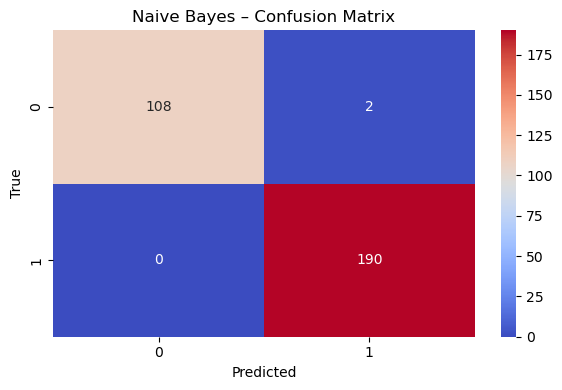

In [526]:
evaluate_model(GaussianNB(), "Naive Bayes", X_train_scaled, y_train, X_test_scaled, y_test, cmap='coolwarm')

### HistGradientBoostingClassifier


🔍 HistGradientBoosting Evaluation
Accuracy: 0.9900
              precision    recall  f1-score   support

       False       1.00      0.97      0.99       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



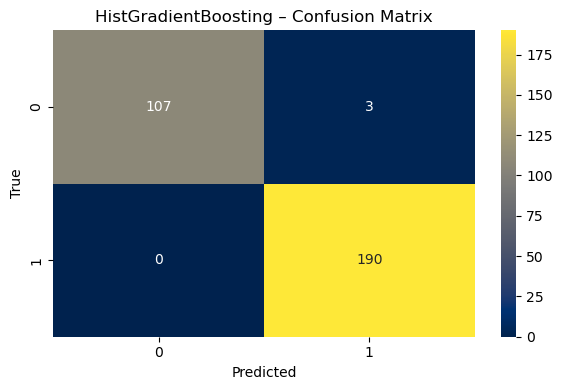

In [527]:
evaluate_model(HistGradientBoostingClassifier(), "HistGradientBoosting", X_train_scaled, y_train, X_test_scaled, y_test, cmap='cividis')

### extratreesclassifier


🔍 Extra Trees Evaluation
Accuracy: 0.9900
              precision    recall  f1-score   support

       False       1.00      0.97      0.99       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



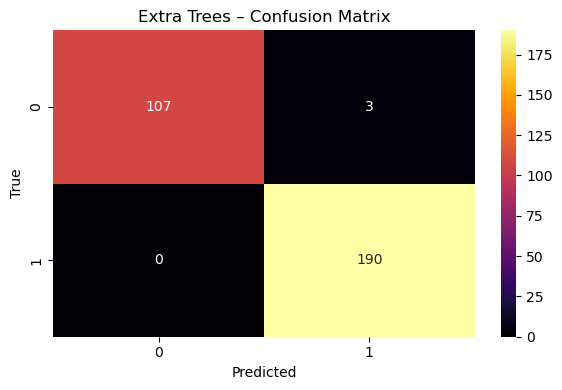

In [528]:
evaluate_model(ExtraTreesClassifier(), "Extra Trees", X_train_scaled, y_train, X_test_scaled, y_test, cmap='inferno')

### GaussianprocessClassifier


🔍 Gaussian Process Evaluation
Accuracy: 0.9933
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       110
        True       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



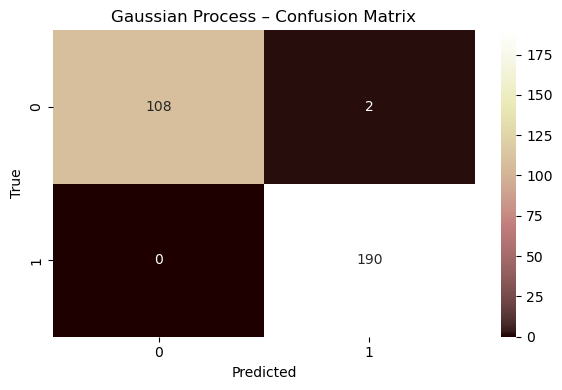

In [529]:
evaluate_model(GaussianProcessClassifier(), "Gaussian Process", X_train_scaled, y_train, X_test_scaled, y_test, cmap='pink')

### RidgeClassifier


🔍 Ridge Classifier Evaluation
Accuracy: 0.9833
              precision    recall  f1-score   support

       False       1.00      0.95      0.98       110
        True       0.97      1.00      0.99       190

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



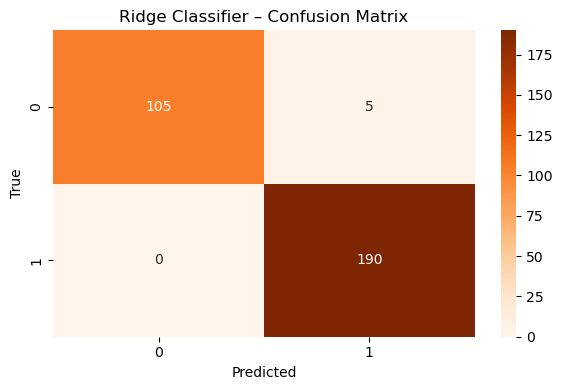

In [530]:
evaluate_model(RidgeClassifier(), "Ridge Classifier", X_train_scaled, y_train, X_test_scaled, y_test, cmap='Oranges')

### Nu SVC


🔍 NuSVC Evaluation
Accuracy: 0.9867
              precision    recall  f1-score   support

       False       1.00      0.96      0.98       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



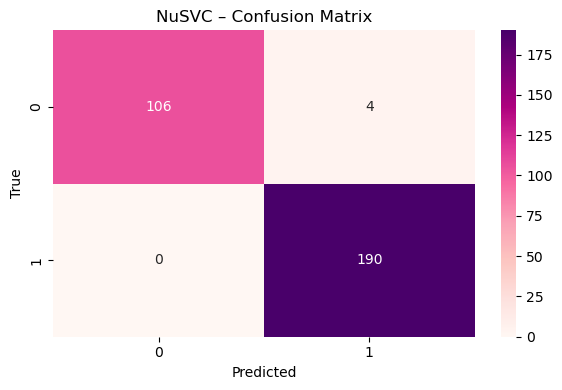

In [531]:
evaluate_model(NuSVC(probability=True), "NuSVC", X_train_scaled, y_train, X_test_scaled, y_test, cmap='RdPu')

### DecisionTreeClassifier


🔍 Decision Tree Evaluation
Accuracy: 0.9900
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       110
        True       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



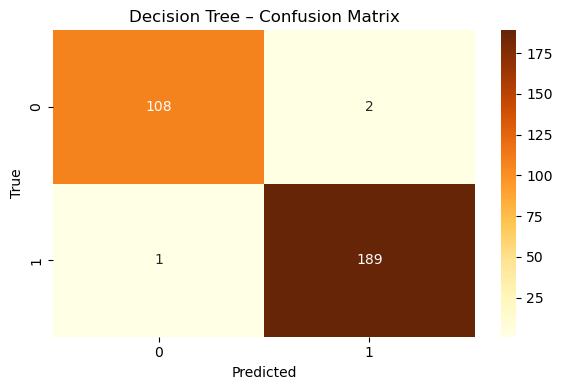

In [532]:
evaluate_model(DecisionTreeClassifier(), "Decision Tree", X_train_scaled, y_train, X_test_scaled, y_test, cmap='YlOrBr')

### BaggingClassifier



🔍 Bagging Evaluation
Accuracy: 0.9900
              precision    recall  f1-score   support

       False       1.00      0.97      0.99       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



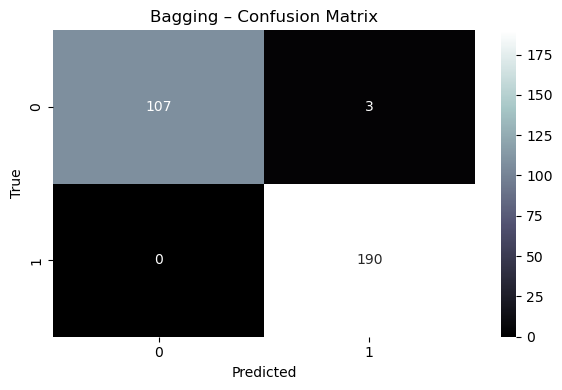

In [533]:
evaluate_model(BaggingClassifier(), "Bagging", X_train_scaled, y_train, X_test_scaled, y_test, cmap='bone')

### AdaBoostClassifier

c:\Users\ruben\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔍 AdaBoost Evaluation
Accuracy: 0.9900
              precision    recall  f1-score   support

       False       1.00      0.97      0.99       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



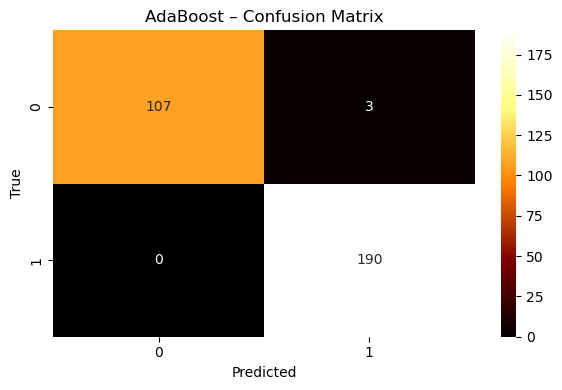

In [534]:
evaluate_model(AdaBoostClassifier(), "AdaBoost", X_train_scaled, y_train, X_test_scaled, y_test, cmap='afmhot')


### LGBMClassifier

[LightGBM] [Info] Number of positive: 810, number of negative: 390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.675000 -> initscore=0.730888
[LightGBM] [Info] Start training from score 0.730888
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

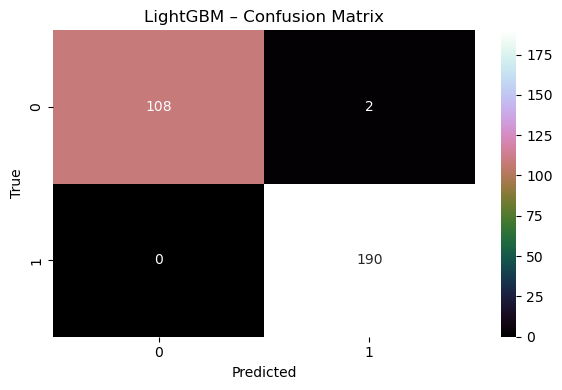

In [535]:
evaluate_model(LGBMClassifier(), "LightGBM", X_train_scaled, y_train, X_test_scaled, y_test, cmap='cubehelix')

### CatBoostClassifier



🔍 CatBoost Evaluation
Accuracy: 0.9867
              precision    recall  f1-score   support

       False       1.00      0.96      0.98       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



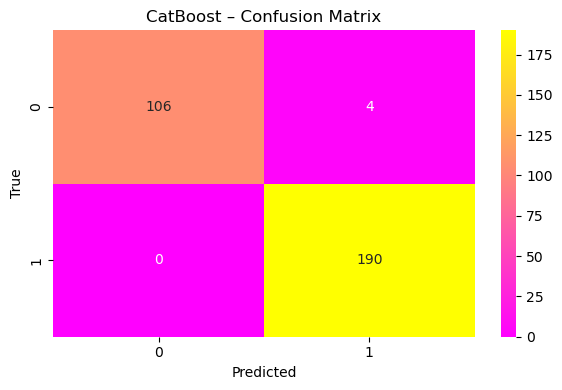

In [536]:
evaluate_model(CatBoostClassifier(verbose=0), "CatBoost", X_train_scaled, y_train, X_test_scaled, y_test, cmap='spring')

### QuadraticDiscriminantAnalysis


🔍 QDA Evaluation
Accuracy: 0.9967
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       110
        True       0.99      1.00      1.00       190

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



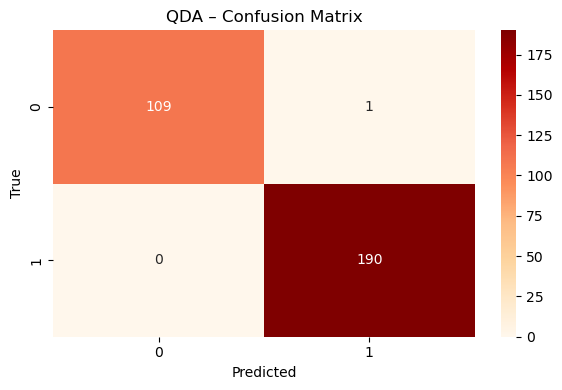

In [537]:
evaluate_model(QuadraticDiscriminantAnalysis(), "QDA", X_train_scaled, y_train, X_test_scaled, y_test, cmap='OrRd')

### LinearDiscriminantAnalysis


🔍 LDA Evaluation
Accuracy: 0.9833
              precision    recall  f1-score   support

       False       1.00      0.95      0.98       110
        True       0.97      1.00      0.99       190

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



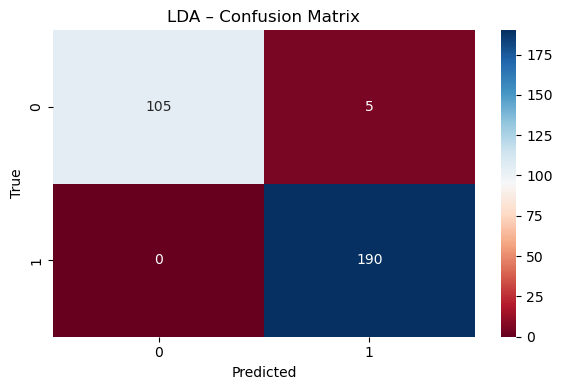

In [538]:
evaluate_model(LinearDiscriminantAnalysis(), "LDA", X_train_scaled, y_train, X_test_scaled, y_test, cmap='RdBu')

### BernoulliNB


🔍 BernoulliNB Evaluation
Accuracy: 0.9600
              precision    recall  f1-score   support

       False       0.95      0.95      0.95       110
        True       0.97      0.97      0.97       190

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



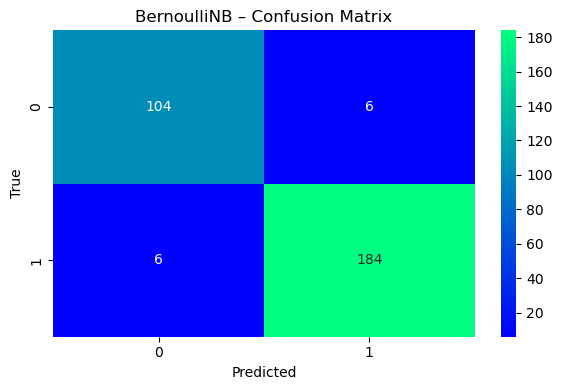

In [539]:
evaluate_model(BernoulliNB(), "BernoulliNB", X_train_scaled, y_train, X_test_scaled, y_test, cmap='winter')

### PassiveAggressiveClassifier


🔍 PassiveAggressive Evaluation
Accuracy: 0.9667
              precision    recall  f1-score   support

       False       0.93      0.98      0.96       110
        True       0.99      0.96      0.97       190

    accuracy                           0.97       300
   macro avg       0.96      0.97      0.96       300
weighted avg       0.97      0.97      0.97       300



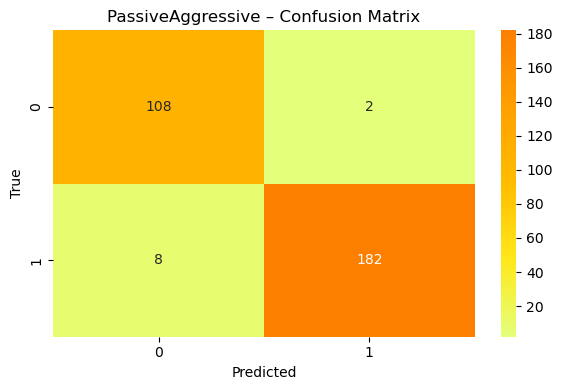

In [540]:
evaluate_model(PassiveAggressiveClassifier(), "PassiveAggressive", X_train_scaled, y_train, X_test_scaled, y_test, cmap='Wistia')

### Perceptron


🔍 Perceptron Evaluation
Accuracy: 0.9867
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       110
        True       0.99      0.98      0.99       190

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



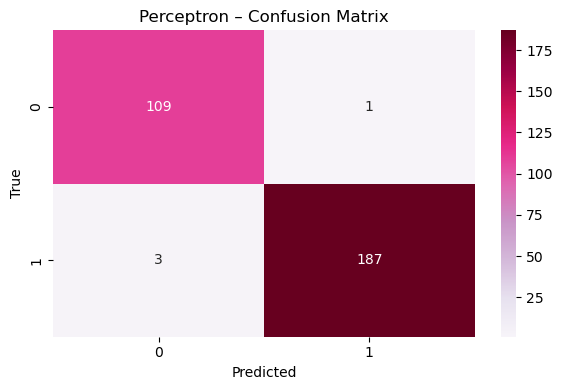

In [541]:
evaluate_model(Perceptron(), "Perceptron", X_train_scaled, y_train, X_test_scaled, y_test, cmap='PuRd')

### Label Propagation


🔍 Label Propagation Evaluation
Accuracy: 0.9767
              precision    recall  f1-score   support

       False       0.98      0.95      0.97       110
        True       0.97      0.99      0.98       190

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.98      0.98      0.98       300



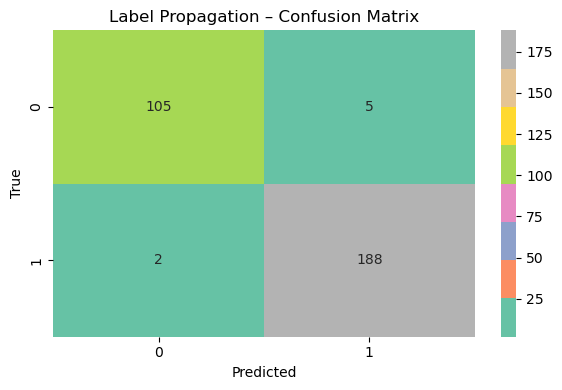

In [542]:
evaluate_model(LabelPropagation(), "Label Propagation", X_train_scaled, y_train, X_test_scaled, y_test, cmap='Set2')